In [3]:
%reload_ext autoreload
%autoreload 2

import os, sys, numpy as np, pandas as pd, tensorflow as tf, cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib import pyplot as plt
from src import utils


# plt.style.use('ggplot')
sns.set(style="whitegrid")

%matplotlib inline

In [15]:
raw_telco = pd.read_csv("./data/telco_customer_churn.csv")
vl = raw.sample(frac=0.2)
tr = raw[~raw.index.isin(vl.index)]

In [12]:
print( tr.Churn.value_counts() )
print( vl.Churn.value_counts() )

No     4124
Yes    1510
Name: Churn, dtype: int64
No     1050
Yes     359
Name: Churn, dtype: int64


In [18]:
a = pd.read_clipboard(header=None)

In [19]:
a = a[[0, 1]]
a

,0,1
0,86,0
1,97,20
2,99,28
3,100,27
4,101,50
5,103,29
6,106,7
7,110,17
8,112,6
9,113,12


In [22]:
# numerator and denominator

def to_level(x):
    xsorted = sorted(set(x))
    xmapper = dict(zip(xsorted, range(len(xsorted))))
    return pd.Series(x).map(xmapper).values
    
def spearman(x1, x2):
    x1_level = to_level(x1)
    x2_level = to_level(x2)
    print( sum((x1_level - x2_level) ** 2) )
    numerator = 6 * sum((x1_level - x2_level) ** 2)
    n = len(x1_level)
    denominator = n * (n**2 - 1)
    return 1 - (numerator / denominator)

spearman(a[0], a[1])

194
1164 1164


-0.17575757575757578

In [14]:
raw = pd.read_csv('https://storage.googleapis.com/allianz-course/data/telco_customer_churn.csv')
raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Figure size 720x1152 with 0 Axes>

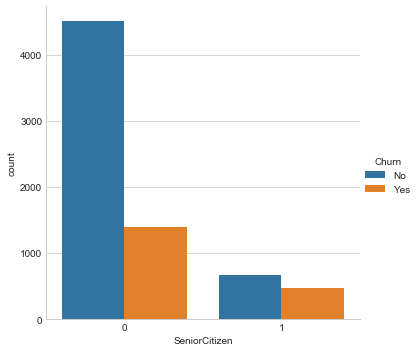

In [18]:
plt.figure(figsize=(10, 16))
sns.catplot(x='SeniorCitizen', hue='Churn', data=raw, kind='count')
plt.show()